In [9]:
from py2neo import Graph
import pandas as pd

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
graph = Graph(bolt = True, host = "localhost", name = "Spotify", user = "neo4j", password = "qrks")

# 0. Test

In [4]:
query = """
        MATCH (a:Artist)-[:ART_TR]->(t:Track)
        WITH a, t
        ORDER BY t.streams DESC
        LIMIT 20
        MATCH (g:Genre)-[:GEN_ART]->(a:Artist)
        RETURN a.artist_name, g.genre_id, t.track_name

"""

In [5]:
cursor = graph.run(query)
df = pd.DataFrame.from_records(cursor, columns=cursor.keys())

# 1. Degree Distribution

In [104]:
query = """
    MATCH (g:Genre)-[r:GEN_ART]->(a:Artist)
    WITH g, COUNT(r) as deg
    RETURN g.genre_id, deg
    ORDER BY deg DESC
"""

In [105]:
cursor = graph.run(query)
df_genres = pd.DataFrame.from_records(cursor, columns=cursor.keys())

In [20]:
df_genres.head(5).to_latex("../imgs/genres.tex")

# 2. Degree of songs features by genre

In [27]:
query = """
    MATCH (g:Genre)-[r:GEN_ART]->(a:Artist)-[rt:ART_TR]-(t:Track)
    WHERE g.genre_id = "latin"
    
    WITH t, COUNT(rt) as deg
    RETURN t.track_name, deg
    ORDER BY deg DESC
"""

In [28]:
cursor = graph.run(query)
df_latin = pd.DataFrame.from_records(cursor, columns=cursor.keys())

In [29]:
query = """
    MATCH (g:Genre)-[r:GEN_ART]->(a:Artist)-[rt:ART_TR]-(t:Track)
    WHERE g.genre_id = "pop"
    
    WITH t, COUNT(rt) as deg
    RETURN t.track_name, deg
    ORDER BY deg DESC
"""

In [30]:
cursor = graph.run(query)
df_pop = pd.DataFrame.from_records(cursor, columns=cursor.keys())

In [96]:
query = """
    MATCH (g:Genre)-[r:GEN_ART]->(a:Artist)-[rt:ART_TR]-(t:Track)
    
    WITH g, t, COUNT(rt) as deg
    RETURN g.genre_id, t.track_name, deg
    ORDER BY g.genre_id, deg DESC
"""

In [97]:
cursor = graph.run(query)
df_all_gen = pd.DataFrame.from_records(cursor, columns=cursor.keys())
df_all_gen.columns = ["genre","track","deg"]
# Take the 10 top genres
set_genres = set(df_genres["g.genre_id"].values[:20])
df_all_gen = df_all_gen[df_all_gen["genre"].isin(set_genres)]

# Visualization

In [136]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager


# Font Montserrat
montserrat = [xx for xx in matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf') 
              if "Montserrat" in xx]


# Corporative Palette
colors = ["#ffd13fff", "#00a082ff", "#434343ff", "#d9d9d9ff"]

# Extra large palette for plotting multiple colors (courtesy of: https://coolors.co/)
colors_extra = ["#ffd13fff", "#00a082ff", "#434343ff", "#d9d9d9ff",
                
                "#084C61","#DB504A","#E3B505","#4F6D7A","#56A3A6",
                "#524948","#57467B","#7CB4B8","#70F8BA","#CAFE48","#CCD7C5","#EFD2CB","#C7A27C",
                "#D65780","#EE9480","#82FF9E","#935FA7","#153243","#B4B8AB","#F4F9E9","#EEF0EB",
                "#586F7C","#F4F4F9","#9AD1D4","#003249","#A09ABC","#D5CFE1","#E1DEE9","#D4BEBE",
                "#646E78","#8D98A7","#DCCCBB","#EAB464","#A7754D","#413620","#9C6615","#9F7833",
                "#FFD791","#F5EFFF","#A594F9","#7371FC","#9A7197","#886176","#EFF1C5","#035E7B",
                "#002E2C","#CBD081","#918868","#FF1053","#6C6EA0","#66C7F4","#C1CAD6","#403233",
                "#6A706E","#B8B8FF","#FFEEDD","#FFD8BE","#0B0033","#370031","#832232","#CE8964","#EAF27C"
                ]

# Plot colors
#sns.palplot(colors_extra)

# Set the stype referencing rcParams (all changes to rcParams should be done AFTER THAT)
sns.set(rc = mpl.rcParams, font = "Montserrat", palette=sns.color_palette(colors))

# Style and Fonts
mpl.rcParams["font.family"] = "Montserrat"
mpl.rcParams["font.weight"] = "semibold"

#Grid
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.linestyle"] = "--"
mpl.rcParams["grid.linewidth"] = 1.5
mpl.rcParams["grid.alpha"] = 0.8

# Axes
mpl.rcParams["axes.edgecolor"] =  colors[2]

# Colors
mpl.rcParams["grid.color"] =  colors[3]
mpl.rcParams["axes.facecolor"] =  "white"

# Size of font
mpl.rcParams["font.size"] = 15
mpl.rcParams["axes.labelsize"] = 15
mpl.rcParams["axes.titlesize"] = 15

#Ticks
mpl.rcParams["xtick.labelsize"] = 13
mpl.rcParams["ytick.labelsize"] = 13


# Font weights
mpl.rcParams["axes.titleweight"] = "semibold"
mpl.rcParams["axes.labelweight"] = "semibold"

# Legend
mpl.rcParams["legend.fontsize"] = 14
mpl.rcParams["legend.title_fontsize"] = 20
mpl.rcParams["patch.edgecolor"] = colors[2]



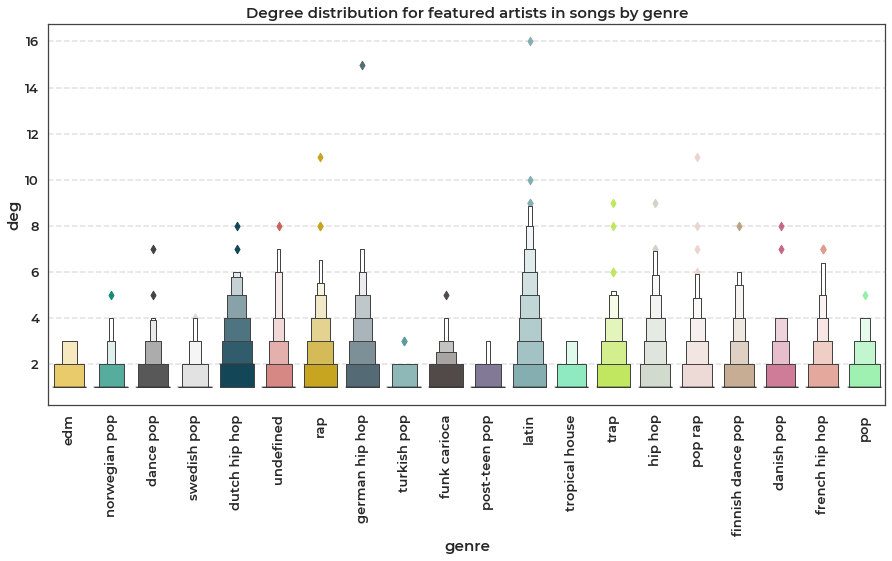

In [152]:
#sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,7))
order = list(set_genres)
g = sns.boxenplot(x="genre", y="deg",color="b", order= order, palette = sns.color_palette(colors_extra), 
                  k_depth="tukey", scale="linear", data=df_all_gen)
g.set_xticklabels(labels = order , rotation=90);
g.set_title("Degree distribution for featured artists in songs by genre")
plt.savefig("degree_genre.jpg")

In [ ]:
#sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,7))
order = list(set_genres)
g = sns.boxenplot(x="genre", y="deg",color="b", order= order, palette = sns.color_palette(colors_extra), 
                  k_depth="tukey", scale="linear", data=df_all_gen)
g.set_xticklabels(labels = order , rotation=90);
g.set_title("Degree distribution for featured artists in songs by genre")

# Visualization